In [108]:
import gilot
import gilot.core
d = gilot.from_csvs(["../mcs.csv"])

In [127]:
odf = d.expand_files()

In [129]:

outer_sup = np.percentile(odf["lines"].values,99.5)
outer_sub =np.percentile(odf["lines"].values,0.5)
df = odf[(outer_sub < odf["lines"]) & (odf["lines"] < outer_sup)] 


In [130]:
import datetime 
from dateutil.relativedelta import relativedelta

now = datetime.datetime.now()
a_year = relativedelta(months=-12)
last = now + a_year
oldest = last - now 
(last,oldest)
df["ntd"] = 1- (df.index - now) / oldest
df.loc[df['ntd'] < 0,'ntd'] = 0
score = 1/(1+np.exp((-12*df["ntd"])+12))
df["hotspot"] = score * np.log10(df["lines"])
by_file = df.groupby("file_name").sum()
by_file = by_file.drop(columns=["ntd"])
by_file["authors"] = df.groupby("file_name").nunique()["author"]
by_file["commits"] = df.groupby("file_name").nunique()["hexsha"]
by_file["edit_rate"] = by_file["insertions"] / by_file["lines"]
#by_file["score"] =  by_file["score"] * by_file["edit_rate"]

by_file.sort_values("hotspot",ascending=False)[:20]


,insertions,deletions,lines,hotspot,authors,commits,edit_rate
file_name,,,,,,,
spec/models/mail_send_manage_spec.rb,10573,1467,12040,26.451213,23,147,0.878156
app/models/mail_send_manage.rb,4886,1562,6448,21.456662,25,175,0.757754
app/models/magellan_summary_result.rb,4299,3897,8196,20.613360,27,246,0.524524
spec/libs/tools/create_organizational_data_book_spec.rb,3807,2538,6345,15.541344,14,27,0.600000
app/frontend/javascript/components/organisms/HelpBox/HelpBoxContent/HelpBoxContent.vue,2155,44,2199,15.361409,10,30,0.979991
spec/models/magellan_summary_result_spec.rb,5952,3363,9315,13.291023,21,111,0.638969
app/frontend/javascript/routes.js,1296,739,2035,13.052444,19,93,0.636855
app/models/magellan_report.rb,3456,2377,5833,12.720400,27,148,0.592491
app/frontend/javascript/components/organisms/HelpBox/HelpBox.vue,1553,522,2075,12.475228,9,20,0.748434


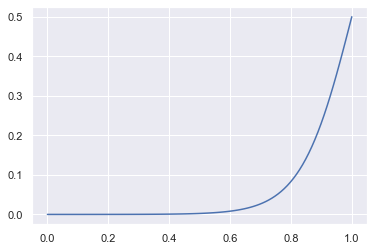

In [111]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,num=100)
y = 1/(1+np.exp((-12*x)+12))
plt.plot(x,y)

In [49]:
a =Test([[1,2,3],[4,5,6]],index =["a","b"],columns=["x","y","z"])
b = pd.DataFrame([[1,2,3],[4,5,6]],index =["a","b"],columns=["x","y","zz"])
c = Test(b.to_numpy(),index=b.index,columns=b.columns)

type(c)
#print(type(a),Test(b.to_numpy()))

__main__.Test